In [ ]:
# day22_the pong game_240720
# breakdown the problem
# my solution: controller ped 1,2 / ball / wall / score board / middle line
teacher solution
step1. create the screen
step2. create and move a paddle
step3. create another paddle
step4. create the ball and make it move
step5. Detect collision with wall and bounce
step6. Detech collision with paddle
step7. Detech when paddle misses
step8. Keep score

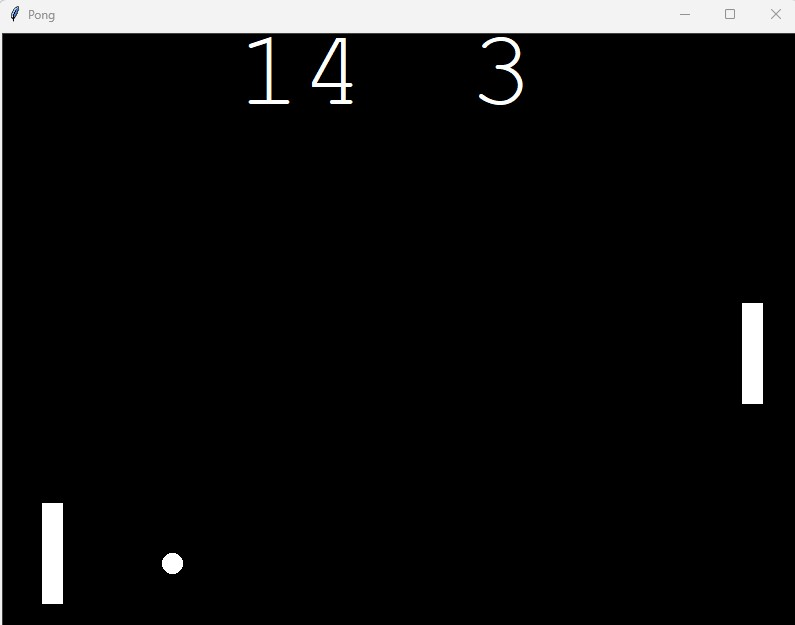

In [1]:
# Playing scence of the game
from PIL import Image
from IPython.display import display
img = Image.open('pong_game.jpg')
display(img)

In [ ]:
# main.py
from turtle import Screen, Turtle
from paddle import Paddle
from ball import Ball
import time
from scoreboard import Scoreboard


screen = Screen()
screen.bgcolor("black")
screen.setup(width=800, height=600)
screen.title("Pong")
screen.tracer(0)

r_paddle = Paddle((350, 0))
l_paddle = Paddle((-350, 0))
ball = Ball()
scoreboard = Scoreboard()

screen.listen()
screen.onkey(r_paddle.go_up, "Up")
screen.onkey(r_paddle.go_down, "Down")
screen.onkey(l_paddle.go_up, "w")
screen.onkey(l_paddle.go_down, "s")


game_is_on = True
pause_time = 0.1
while game_is_on:
    time.sleep(pause_time)
    screen.update()
    ball.move()

    # Detech collision with the wall
    if ball.ycor() > 280 or ball.ycor() < -280:
        # needs to be bounced
        ball.bounce_y()

    # Detech collision with the paddel
    if ball.distance(r_paddle) < 50 and ball.xcor() > 320 or ball.distance(l_paddle) < 50 and ball.xcor() < -320:
        ball.bounce_x()
        pause_time *= 0.8

    if ball.xcor() > 360:
        ball.reset_position()
        scoreboard.l_point()

    if ball.xcor() < -360:
        ball.reset_position()
        scoreboard.r_point()


screen.exitonclick()

In [ ]:
# paddle.py
from turtle import Turtle

class Paddle(Turtle):

    def __init__(self, position):
        super().__init__()
        self.shape("square")
        self.color("white")
        self.shapesize(stretch_wid=5, stretch_len=1)
        self.penup()
        self.goto(position)

    def go_up(self):
        new_y = self.ycor() + 20
        self.goto(self.xcor(), new_y)

    def go_down(self):
        new_y = self.ycor() - 20
        self.goto(self.xcor(), new_y)


In [ ]:
# ball.py
from turtle import Turtle

class Ball(Turtle):
    def __init__(self):
        super().__init__()
        self.shape("circle")
        self.color("white")
        self.penup()
        self.x_move = 10
        self.y_move = 10

    def move(self):
        new_x = self.xcor() + self.x_move
        new_y = self.ycor() + self.y_move
        self.goto(new_x, new_y)

    def bounce_y(self):
        self.y_move *= -1

    def bounce_x(self):
        self.x_move *= -1

    def reset_position(self):
        self.goto(0,0)
        self.x_move *= -1

In [ ]:
# scoreboard.py

from turtle import Turtle

class Scoreboard(Turtle):
    def __init__(self):
        super().__init__()
        self.color("white")
        self.penup()
        self.hideturtle()
        self.l_score = 0
        self.r_score = 0
        self.update_scoreboard()

    def update_scoreboard(self):
        self.clear()
        self.goto(-100, 200)
        self.write(self.l_score, align = "center", font=("Courier", 80, "normal"))
        self.goto(100,200)
        self.write(self.r_score, align="center", font=("Courier", 80, "normal"))

    def l_point(self):
        self.l_score +=1
        self.update_scoreboard()

    def r_point(self):
        self.r_score +=1
        self.update_scoreboard()


